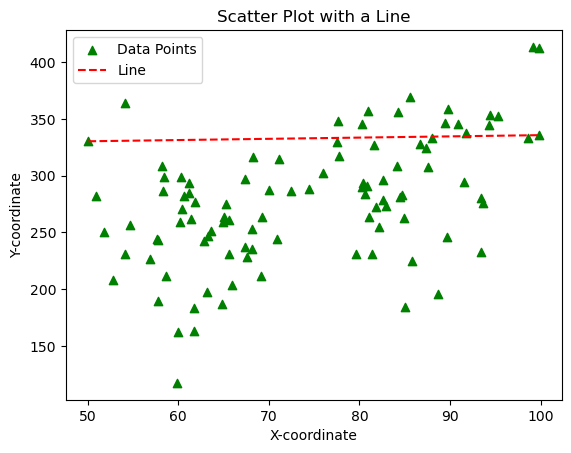

In [1]:
# Part 1 - Generate Plots According to Specifications
# Question 1
import pandas as pd
import matplotlib.pyplot as plt

# Step (a): Read data from the file and ignore comment lines starting with '%'
data = pd.read_csv("C:/Users/hp/OneDrive/Desktop/scatter_data.csv", comment='%')

# Use the first and second columns from the CSV file
# Replace 'Column1' and 'Column2' with the actual column names in your CSV file
x = data.iloc[:, 0]  # Assuming 'x' data is in the first column
y = data.iloc[:, 1]  # Assuming 'y' data is in the second column

# Step (b): Plot the data points as green triangles
plt.scatter(x, y, marker='^', color='green', label='Data Points')

# Find the minimum and maximum x-values
min_x = x.min()
max_x = x.max()

# Plot a line connecting the two extreme points on the x-axis
plt.plot([min_x, max_x], [y[x.idxmin()], y[x.idxmax()]], linestyle='--', color='red', label='Line')

# Step (d): Title for the plot
plt.title('Scatter Plot with a Line')

# Step (e): Label the x- and y-axes
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Step (f): Include a legend
plt.legend()

# Display the plot
plt.show()

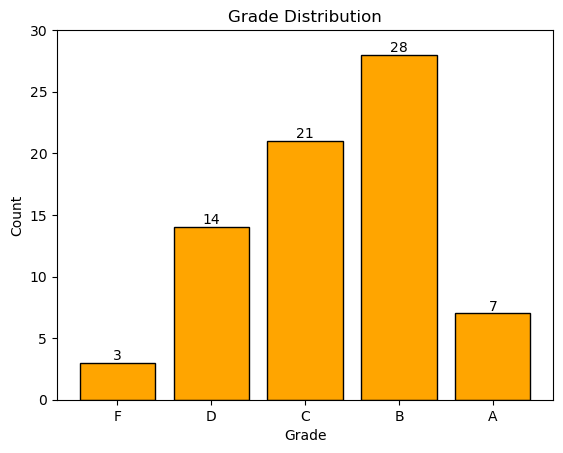

In [3]:
# Question 2
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv("C://Users/hp/Downloads/student_grades.csv")
df1
df1.columns = df1.columns.str.strip()
score = [(0, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
label = ['F', 'D', 'C', 'B', 'A']
df1['Letter Grade'] = pd.cut(df1['avgScore'], bins=[0, 60, 70, 80, 90, 101], labels=label, right=False) 
grades = df1['Letter Grade'].value_counts().reindex(labels, fill_value=0)
plt.bar(label, grades, color='orange', edgecolor='black')
for label, count in zip(label, grades):
    plt.text(label, count, str(count), ha='center', va='bottom')

plt.title("Grade Distribution")
plt.ylim(0,30)
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

In [7]:
# Question 3
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:/Users/hp/Downloads/solution_data.csv")
df.head()

,% Problem,SolnMethod,Value
0,0,genetic algorithm,112.749860
1,0,simulated annealing,75.220917
2,0,tabu search,111.574225
3,0,optimal,166.170172
4,1,genetic algorithm,31.819762


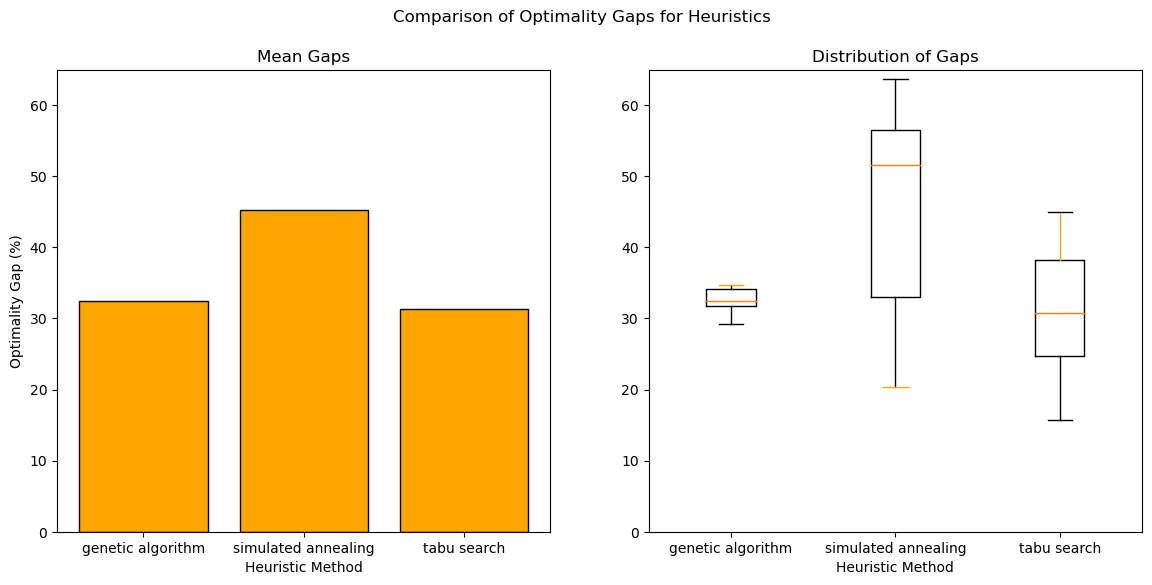

In [10]:
df['gap'] = df.groupby('% Problem')['Value'].transform(max) - df['Value']
df['gap_percent'] = (df['gap'] / df.groupby('% Problem')['Value'].transform(max)) * 100
heuristic_df = df[df['SolnMethod'] != 'optimal']
avg_gaps = heuristic_df.groupby('SolnMethod')['gap_percent'].mean().reset_index()
boxplot_data = heuristic_df.groupby('SolnMethod')['gap_percent'].apply(list).reset_index(name='gaps')
plt.figure(figsize=(14, 6))

# Barplot
plt.subplot(1, 2, 1)
plt.bar(avg_gaps['SolnMethod'], avg_gaps['gap_percent'], color='orange', edgecolor='black')
plt.xlabel('Heuristic Method')
plt.ylabel('Optimality Gap (%)')
plt.title('Mean Gaps')

plt.ylim(0,65)

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(boxplot_data['gaps'], labels=boxplot_data['SolnMethod'])
plt.xlabel('Heuristic Method')
plt.title('Distribution of Gaps')

plt.ylim(0,65)
# Set the median line color.
for median in plt.gca().lines[4::6]:
    median.set_color('orange')

plt.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.show()

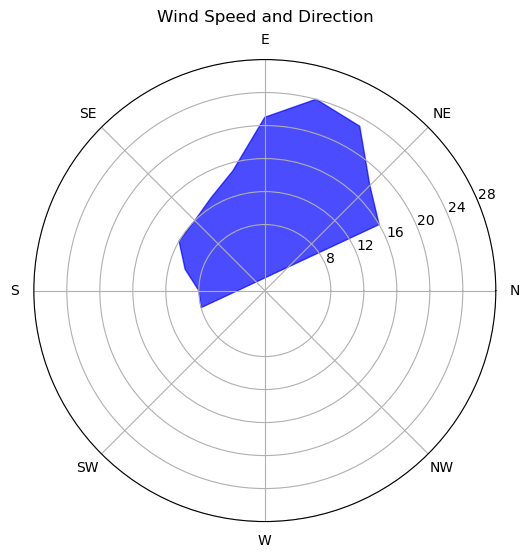

In [11]:
# Part 2 - Explore New Plot Types
#URL https://www.windfinder.com/forecast/new_buffalo_lake_michigan

# Explanation 
#1. We generate wind speed and direction data samples. Wind speed is measured in meters per second, while wind direction is measured in degrees.
#2. Because polar plots in Matplotlib anticipate data in radians, we convert wind direction from degrees to radians.
#3. Using plt.subplot(111, polar=True), we generate a polar plot.
#4. We used ax.set_xticks and ax.set_xticklabels to create labels for the cardinal directions (North, East, South, and West).
#5. We use ax.set_yticks to set radial gridlines at particular wind speed levels, and ax.grid(True) to add gridlines.
#6. Finally, we use plt.show to display the polar plot.()

import numpy as np
import matplotlib.pyplot as plt

# Sample data for wind speed (in miles per hour) and direction (in degrees)
wind_speed = [16, 18, 23, 24, 21, 15, 13, 12, 12, 10, 8, 8]
wind_direction_deg = [30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195]

# Convert wind direction from degrees to radians
wind_direction_rad = np.radians(wind_direction_deg)

# Create a polar plot
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Plot wind data on the polar plot
ax.fill(wind_direction_rad, wind_speed, color='b', alpha=0.7)

# Set labels for cardinal directions (North, East, South, West)
ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

# Set the radial gridlines
ax.set_yticks([8, 12, 16, 20, 24, 28])
ax.grid(True)

plt.title('Wind Speed and Direction', va='bottom')

# Show the polar plot
plt.show()